# $^{135}$Pr - Transition probabilities
## Numerical calculus
### Author: Robert Poenaru

Algorithm for calculating the transition probabilities for the isotope. 

Experimental data taken from **TO BE DETERMINED**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sp
from matplotlib import rc

## Define the prerequisite methods used in the elliptic variables
* the angular momentum components $j_1,j_2$
* the inertia function $A$, where $A=f(I,j_2,A_1,A_2)$
* the 2nd component of the odd particle's a.m. $j_2$ is a function $j_2=g(j,\theta)$

> $A=f(I,g(j,\theta),A_1,A_2)$

In [2]:
# define the inertia factors A1, A2, A3
def inertiaFactor(mois):
    a1=1.0/(2.0*mois[0])
    a2=1.0/(2.0*mois[1])
    a3=1.0/(2.0*mois[2])
    factors=(a1,a2,a3)
    return factors
# define the components of the angular momenta $j$ for the odd-particle
def jComponent(oddSpin,theta):
    thetaDegrees=theta*np.pi/180.0
    j1=oddSpin*np.cos(thetaDegrees)
    j2=oddSpin*np.sin(thetaDegrees)
    jcomp=(j1,j2)
    return jcomp
#define the inertial function
def aFct(spin,oddSpin,theta,mois):
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    term=a2*(1.0-j2/spin)-a1
    return term

## Defining the elliptic variables
* $u=f(A,A_1,A_3)$
* $v_0=f(A,A_1,j_1)$

In [3]:
#define the variabile u
def u(spin,oddSpin,theta,mois):
    a3=inertiaFactor(mois)[2]
    a1=inertiaFactor(mois)[0]
    a=aFct(spin,oddSpin,theta,mois)
    term=(a3-a1)/a
    return term

#define the variabile v0
def vZero(spin,oddSpin,theta,mois):
    a1=inertiaFactor(mois)[0]
    j1-Jcomponent(oddSpin,theta)[0]
    a=aFct(spin,oddSpin,theta,mois)
    term=a1*j1/a
    return (-1.0)*term

#define the variable k
def k(spin,oddSpin,theta, mois):
    return np.sqrt(u(spin,oddSpin,theta,mois))

#define the wobbling frequency
def omega(spin,oddSpin,theta,mois):
    j1=jComponent(oddSpin,theta)[0]
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    a3=inertiaFactor(mois)[2]
    term1=(2.0*spin+1.0)*(a2-a1-(a2*j2)/spin)-2*a1*j1
    term2=(2.0*spin+1.0)*(a3-a1)-2.0*a1*j1
    term3=(a3-a1)*(a2-a1-a2*j2/spin)
    result=np.sqrt(term1*term2-term3)
    return result

def omegaPrime(spin,oddSpin,theta,mois):
    j1=jComponent(oddSpin,theta)[0]
    j2=jComponent(oddSpin,theta)[1]
    a1=inertiaFactor(mois)[0]
    a2=inertiaFactor(mois)[1]
    a3=inertiaFactor(mois)[2]
    term1=(2.0*spin+1.0)*(a2-a1-(a2*j2)/spin)+2*a1*j1
    term2=(2.0*spin+1.0)*(a3-a1)+2.0*a1*j1
    term3=(a3-a1)*(a2-a1-a2*j2/spin)
    result=np.sqrt(term1*term2-term3)
    return result

def omegaBar(spin,oddSpin,theta,mois):
    a=aFct(spin,oddSpin,theta,mois)
    omg=omega(spin,oddSpin,theta,mois)
    return omg/a

## Testing the wobbling frequencies
$$\omega_I^\theta$$
> the wobbling frequency for $\theta=20^o$: 

$$\omega_I^{20}$$

In [4]:
def omegaPrinter(theta):
    omegas=[]
    spins=np.arange(5.0,35.0,0.1)
    mois=(129,3,52)
    j=11/2
    for i in spins:
        currentomega=omega(i,j,theta,mois)
        omegas.append(currentomega)
    return omegas

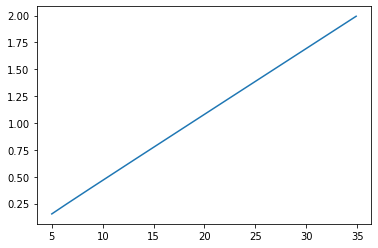

In [5]:
spins=np.arange(5.0,35.0,0.1)
omegas20=omegaPrinter(20)
plt.plot(spins,omegas20)
plt.show()

> the wobbling frequency for $\theta=-160^o$: 

$$\omega_I^{-160}$$

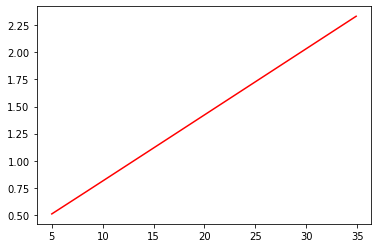

In [6]:
omegas160=omegaPrinter(-160)
plt.plot(spins,omegas160,'r-')
plt.show()

## Define the Dirac-Delta function

In [7]:
def diracDelta(x,y):
    if(x==y):
        return 1
    else:
        return 0

Testing the Dirac-Delta function

In [8]:
m=(4,5)
if(diracDelta(m[0],m[1])):
    print("we good")
else:
    print("we NOT good")

we NOT good


## norm and oscillator length methods

In [9]:
def oscLength(spin,oddSpin,theta,mois):
    omBar=omegaBar(spin,oddSpin,theta,mois)
    result=np.sqrt(2.0/omBar)
    return result

def cNorm(spin,oddSpin,theta, mois):
    ct=np.sqrt(2.0/np.pi)
    term=1.0/oscLength(spin,oddSpin,theta,mois)
    return ct*term

# Define the quadrupole moments

### Define the $Q_0$ term for transitions of the type
> $$\langle\Phi_{I',-I'}|Q_0|\Phi_{I,I-1}\rangle$$
> NOTATION: $$Q01$$
> $$I' \to\ spin1$$
> $$I \to\ spin2$$

## The parameter set X
the parameter set which enters in the quadrupole methods
$$ X=\left\{j,\theta,A_1,A_2,A_3\right\}$$

* oddSpin
* theta
* mois

In [19]:
#define the parameter set of the form described above
paramSet=(11/2,-160,129,3,52)
def Q01(spin1,spin2,paramSet):
    oddSpin=paramSet[0]
    theta=paramSet[1]
    mois=(paramSet[2],paramSet[3],paramSet[4])
    delta=diracDelta(spin2,spin1)
    ombar1=omegaBar(spin1,oddSpin,theta,mois)
    ombar2=omegaBar(spin2,oddSpin,theta,mois)
    k1=k(spin1,oddSpin,theta,mois)
    k2=k(spin2,oddSpin,theta,mois)
    term1=np.sqrt(ombar1*ombar2)
    term2=np.power(ombar1+ombar2,2)
    frac=term1/term2
    term3=(spin2-1.0)*(ombar2-spin2*(1+np.power(k2,2)))
    term4=spin2*(2*spin2-1)*(ombar1+ombar2)/12.0
    braket=term3+term4
    c1=4*np.sqrt(6)
    result=c1*frac*braket*delta
    return result

### Define the $Q_2$ quadrupole component for transitions of the type
> $$\langle\Phi_{I',-I'}|Q_2|\Phi_{I,-I+1}\rangle$$
> NOTATION: $$Q20$$
> $$I' \to\ spin1$$
> $$I \to\ spin2$$

In [22]:
def Q20(spin1,spin2,paramSet):
    oddSpin=paramSet[0]
    theta=paramSet[1]
    mois=(paramSet[2],paramSet[3],paramSet[4])
    ombar1=omegaBar(spin1,oddSpin,theta,mois)
    ombar2=omegaBar(spin2,oddSpin,theta,mois)
    k1=k(spin1,oddSpin,theta,mois)
    k2=k(spin2,oddSpin,theta,mois)
    frac1=(1+np.power(k1,2))/(1-np.power(k1,2))
    c1=np.sqrt(4.0/spin2)
    frac2=(np.sqrt(ombar1)*ombar2)/(ombar2+ombar1)
    spinspin=spin1*spin2
    bterm1=(1.0/(ombar1+ombar2))*(1.0/(1+np.power(k1,2)))
    bterm2=ombar1*ombar2+4*spinspin*np.power(k1,2)*(np.power(k1,2)+3)
    bterm3=(spin2*ombar1)/(1+np.power(k1,2))
    bterm4=4.0/(ombar1+ombar2)
    bterm5=-ombar1*spin2*(spin1-1)-spinspin*(spin1+1)+(spin2*np.power(ombar1,2))/(1+np.power(k1,2))+0.25*spin1*ombar2
    curlyBraket=spinspin-bterm1*bterm2-bterm3+bterm4*bterm5
    result=frac1*c1*frac2*curlyBraket
    return result

## Define the $Q_2$ component for the transition quadrupole moment
> $$\langle\Phi_{I',-I'+1}|Q_2|\Phi_{I,-I}\rangle$$
> NOTATION: $$Q21$$
> $$I' \to\ spin1$$
> $$I \to\ spin2$$

In [28]:
def Q21(spin1,spin2,paramSet):
    oddSpin=paramSet[0]
    theta=paramSet[1]
    mois=(paramSet[2],paramSet[3],paramSet[4])
    ombar1=omegaBar(spin1,oddSpin,theta,mois)
    ombar2=omegaBar(spin2,oddSpin,theta,mois)
    k1=k(spin1,oddSpin,theta,mois)
    k2=k(spin2,oddSpin,theta,mois)
    frac1=(1+np.power(k2,2))/(1-np.power(k2,2))
    c1=np.sqrt(4/spin1)
    frac2=(ombar1*np.sqrt(ombar2))/(ombar1+ombar2)
    spinspin=spin1*spin2
    bterm1=(1.0/(ombar1+ombar2))*(1.0/(1+np.power(k2,2)))
    bterm2=ombar2*ombar1+4.0*spinspin*np.power(k2,2)*(np.power(k2,2)+3)
    bterm3=(spin1*ombar2)/(1+np.power(k2,2))
    bterm4=4.0/(ombar1+ombar2)
    bterm5=-ombar2*spin1*(spin2-1)-spinspin*spin2*(spin2+1)+(spin1*np.power(ombar2,2))/(1+np.power(k2,2))+0.25*spin2*ombar1
    curlyBraket=spinspin-bterm1*bterm2-bterm3+bterm4*bterm5
    result=-frac1*c1*frac2*curlyBraket
    return result

## Define the $Q_2$ component for the transition quadrupole moment
> $$\langle\Phi_{I,-I}|Q_2|\Phi_{I-2,-(I-2)}\rangle$$
> NOTATION: $$Q22$$
> $$I \to\ spin$$

In [31]:
def Q22(spin,paramSet):
    oddSpin=paramSet[0]
    theta=paramSet[1]
    mois=(paramSet[2],paramSet[3],paramSet[4])
    ombarI=omegaBar(spin,oddSpin,theta,mois)
    ombarIm2=omegaBar(spin-2,oddSpin,theta,mois)
    kIm2=k(spin-2,oddSpin,theta,mois)
    frac1=(1+np.power(kIm2,2))/(1-np.power(kIm2,2))
    frac2=np.sqrt(ombarI*ombarIm2)/(ombarI+ombarIm2)
    bterm1=ombarIm2/(1+np.power(kIm2,2))-(spin-2)
    bterm2=(4.0*(spin-2.0))/(ombarI+ombarIm2)
    bterm3=spin-1-ombarIm2+(np.power(kIm2,2)*(np.power(kIm2,2)+3))/(np.power(kIm2,2)+1)
    curlyBrakets=bterm1+bterm2*bterm3
    result=2.0*frac1*frac2*curlyBrakets
    return result

## Testing the $\bar{\omega}_I$ term and the $k_I$ term

In [40]:
spins=np.arange(5.0,35.1,0.1)
omegas=[]
ombars=[]
for i in spins:
    mois=(paramSet[2],paramSet[3],paramSet[4])
    currentomega=omega(i,paramSet[0],paramSet[1],mois)
    currentomegabar=omegaBar(i,paramSet[0],paramSet[1],mois)
    omegas.append(currentomega)
    ombars.append(currentomegabar)

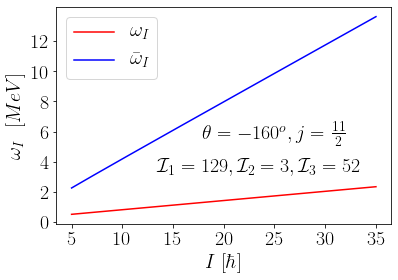

In [74]:
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig, ax=plt.subplots()
ax.plot(spins,omegas,'r-',label='$\omega_I$')
ax.plot(spins,ombars,'b-',label='$\\bar{\omega}_I$')
ax.set_xticks([5,10,15,20,25,30,35])
ax.set_yticks([0,2,4,6,8,10,12])
plt.legend(loc='best',prop={'size': 20})
plt.xlabel('$I\ [\hbar]$')
plt.ylabel('$\omega_I\ \  [MeV]$')
ax.text(0.6, 0.25, '$\mathcal{I}_1=129,\mathcal{I}_2=3,\mathcal{I}_3=52$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
ax.text(0.65, 0.4, '$\\theta=-160^o,j={11 \over 2}$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
plt.savefig("ombars.pdf",bbox_inches='tight')
plt.show()

In [84]:
spins=[]
ks=[]
for i in np.arange(5,40,5):
    spins.append(i)
    mois=(paramSet[2],paramSet[3],paramSet[4])
    ks.append(k(i,paramSet[0],paramSet[1],mois))
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig, ax=plt.subplots()
ax.plot(spins,ks,'r-',label='$\omega_I$')
ax.set_xticks([5,10,15,20,25,30,35])
# ax.set_yticks([0,2,4,6,8,10,12])
plt.legend(loc='best',prop={'size': 20})
plt.xlabel('$I\ [\hbar]$')
plt.ylabel('$\omega_I\ \  [MeV]$')
# ax.text(0.6, 0.25, '$\mathcal{I}_1=129,\mathcal{I}_2=3,\mathcal{I}_3=52$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
# ax.text(0.65, 0.4, '$\\theta=-160^o,j={11 \over 2}$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=20)
plt.savefig("kaii.pdf",bbox_inches='tight')
plt.show()